In [1]:
#!pip install pandas_datareader, keras, tensorflow

In [2]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, CuDNNLSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
#TSLA
#AAPL
stocks=["AAPL"]
start_date = '2012-01-01'
end_date = '2019-12-17'

In [4]:
df = web.DataReader("AAPL", data_source='yahoo', start= start_date, end= end_date )
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.519278
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.586560
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.726295
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.859334
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.838937
...,...,...,...,...,...,...
2019-12-11,67.775002,67.125000,67.202499,67.692497,78756800.0,66.316833
2019-12-12,68.139999,66.830002,66.945000,67.864998,137310400.0,66.485817
2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,67.389572


In [5]:
df.shape

(2003, 6)

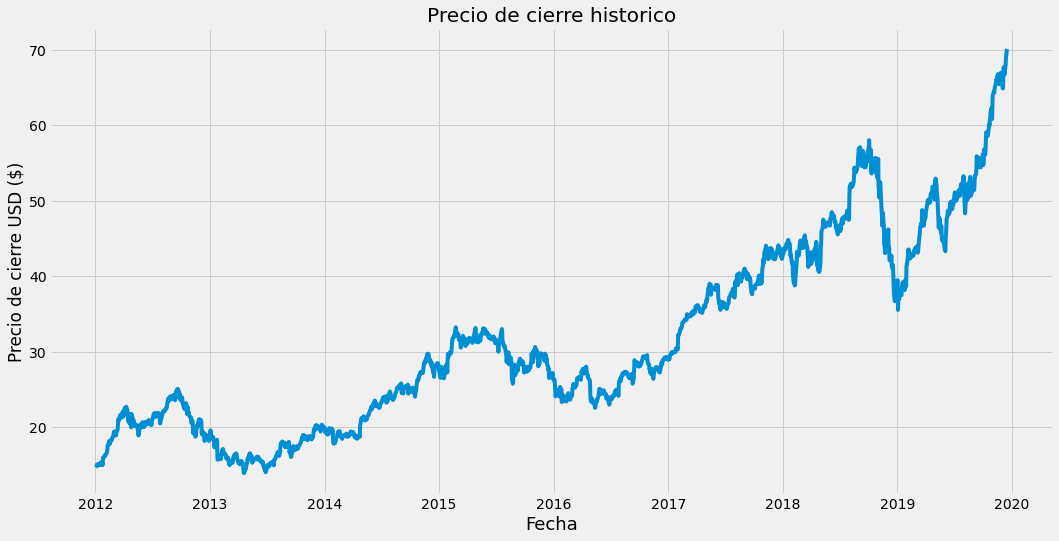

In [6]:
#"Visualización"
plt.figure(figsize=(16,8))
plt.title('Precio de cierre historico')
plt.plot(df['Close'])
plt.xlabel('Fecha', fontsize = 18)
plt.ylabel('Precio de cierre USD ($)')
plt.show()

In [7]:
#Muestra de datos
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

1603

In [8]:
#Normalizando los datos
scaler = MinMaxScaler(feature_range=(0,1))
datos_escalados = scaler.fit_transform(dataset)

datos_escalados

array([[0.01316509],
       [0.01457063],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [9]:
#Entrenando el set de datos
#Creando el entrenador de datos escalados
train_data = datos_escalados[0:training_data_len , :]

#Separando los datos por eje X y eje Y
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01893355, 0.02345548, 0.01900352,
       0.03569838, 0.03440732, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814049, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661394,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632778, 0.09835024, 0.10269409, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701237, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01

In [10]:
#Convertir x_train y y_train en arrays de numpy
x_train, y_train = np.array(x_train), np.array(y_train)


In [11]:
#Reacomodar la informacion
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) 
x_train.shape 

(1543, 60, 1)

In [12]:
#Construyendo el LTSM model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [14]:
#Compilando el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
#Entrenando el modelo
model.fit(x_train, y_train, batch_size=1, epochs=1)

1543/1543 [==============================] - 27s 16ms/step - loss: 9.5767e-04


In [16]:
#Creando el set de datos de testeo
test_data = datos_escalados[training_data_len - 60: , :]

#Creando los data sets x_test y y _test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range( 60, len(test_data)):
     x_test.append(test_data[i-60: i, 0])

In [33]:
dataset[training_data_len:, :]

array([[46.74750137],
       [46.57749939],
       [46.90750122],
       [46.79000092],
       [47.09000015],
       [47.03749847],
       [47.14500046],
       [46.97499847],
       [46.875     ],
       [46.71749878],
       [47.56000137],
       [47.95750046],
       [48.32749939],
       [48.49499893],
       [48.36500168],
       [47.92499924],
       [47.80749893],
       [48.06999969],
       [47.67499924],
       [47.70000076],
       [47.20999908],
       [47.18500137],
       [46.42250061],
       [46.625     ],
       [46.36500168],
       [46.22999954],
       [45.54249954],
       [46.10749817],
       [46.04000092],
       [46.375     ],
       [46.27750015],
       [46.79499817],
       [45.97999954],
       [46.34999847],
       [46.99250031],
       [47.64500046],
       [47.58750153],
       [46.97000122],
       [47.75749969],
       [47.83250046],
       [47.72750092],
       [47.86249924],
       [47.59999847],
       [47.97000122],
       [47.86000061],
       [47

In [17]:
#Convertir a data numpy
x_test = np.array(x_test)

In [18]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [19]:
#Obteniend los modelos predictivos del precioo de cierre 
predicciones = model.predict(x_test)
predicciones = scaler.inverse_transform(predicciones)

13/13 [==============================] - 1s 9ms/step


In [20]:
x_test.shape

(400, 60, 1)

In [21]:
#Obteniendo el "Root Mean Squared Error" (RMSE)
rmse = np.sqrt(np.mean(predicciones - y_test)**2)
rmse

0.4661045837402344

In [22]:
#Imprimir los datos
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predicciones'] = predicciones

C:\Users\wiied\AppData\Local\Temp\ipykernel_8568\2620758798.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predicciones'] = predicciones


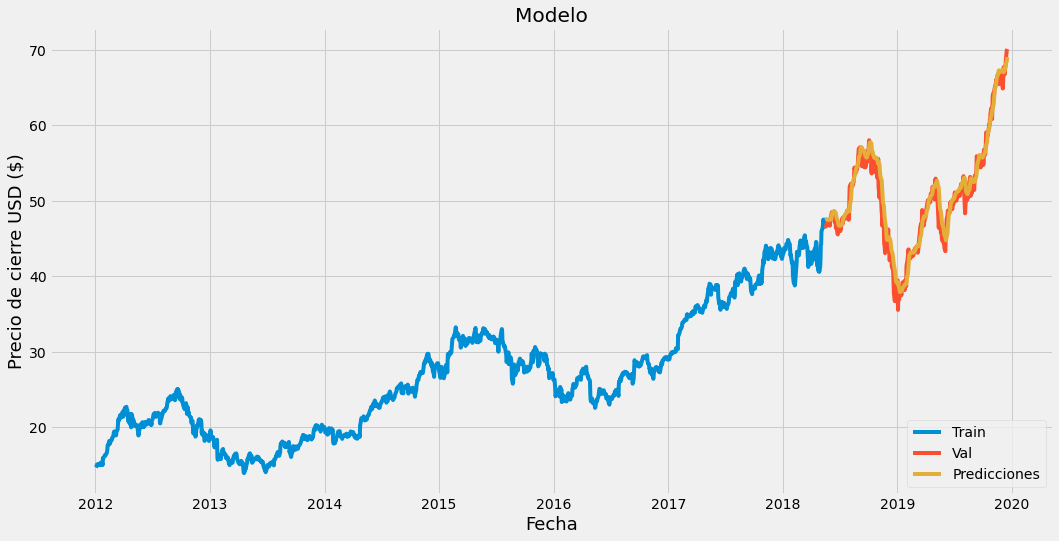

In [23]:
#Visualizando los datos
plt.figure(figsize=(16,8))
plt.title('Modelo')
plt.xlabel('Fecha', fontsize = 18)
plt.ylabel('Precio de cierre USD ($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predicciones']])
plt.legend(['Train', 'Val', 'Predicciones'], loc = 'lower right')
plt.show()

In [24]:
#Mostrando los precios predecidos 
valid

,Close,Predicciones
Date,,
2018-05-17,46.747501,47.544678
2018-05-18,46.577499,47.578579
2018-05-21,46.907501,47.539379
2018-05-22,46.790001,47.510025
2018-05-23,47.090000,47.471115
...,...,...
2019-12-11,67.692497,67.599937
2019-12-12,67.864998,67.856422
2019-12-13,68.787498,68.129951


In [25]:
train

,Close
Date,
2012-01-03,14.686786
2012-01-04,14.765714
2012-01-05,14.929643
2012-01-06,15.085714
2012-01-09,15.061786
...,...
2018-05-10,47.509998
2018-05-11,47.147499
2018-05-14,47.037498


In [26]:
apple_quote = web.DataReader("AAPL", data_source='yahoo', start = '2012-01-01', end = '2019-12-17')

new_df = apple_quote.filter(['Close'])

last_60_days = new_df[-60:].values

last_60_days_scaled = scaler.transform(last_60_days)

X_test = []

X_test.append(last_60_days_scaled)

X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

pred_price = model.predict(X_test)

pred_price = scaler.inverse_transform(pred_price)

print(pred_price)


1/1 [==============================] - 0s 23ms/step
[[69.58671]]


In [28]:
df = web.DataReader("AAPL", data_source='yahoo', start= '2019-12-18', end= '2019-12-18' )
df[]

Date
2019-12-18    69.934998
Name: Close, dtype: float64